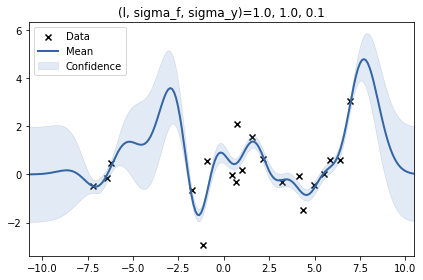

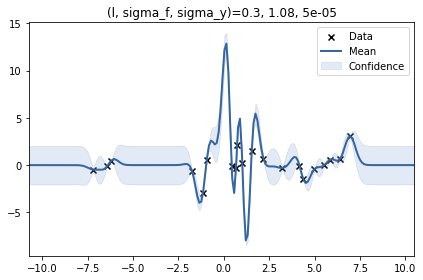

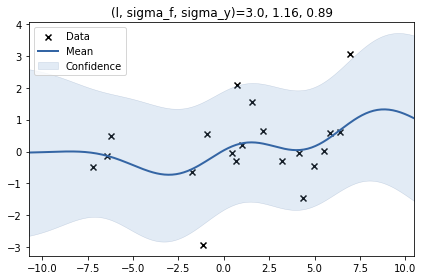

In [2]:
# import pyprobml_utils as pml

#!pip install GPy

import numpy as np
import matplotlib.pyplot as plt 
import GPy
from scipy import linalg
import scipy.spatial.distance as spdist

# Dataset according to the matlab code:
n = 20
np.random.seed(0)
x = 15*(np.random.uniform(low=0, high=1, size=20) - 0.5).reshape((-1,1))
sigma_y = 0.1
sigma_f = 1.0
l = 1.0
q = spdist.cdist(x/l, x/l, 'sqeuclidean')
A = (sigma_y**2)*np.eye(n) + (sigma_f**2)*np.exp(-0.5*q)        
B = linalg.cholesky(A)
B = B.conjugate()
y = B.dot(np.random.randn(n, 1))   
     
xstar = np.linspace(-7.5, 7.5, 201)
xstar = xstar.reshape(-1, 1)

l = np.array([1.0, 0.3, 3.0])
sigma_f = np.array([1, 1.08, 1.16])
sigma_y = np.array([0.1, 0.00005, 0.89])

def generate_plots(sigma_f, l, sigma_y):
    kernel = GPy.kern.RBF(1, sigma_f, l) 
    model = GPy.models.GPRegression(x , y, kernel) 
    model.Gaussian_noise.variance = sigma_y**2
    model.Gaussian_noise.variance.fix()
    mean, variance = model.predict(xstar)
    model.plot()
    plt.title("(l, sigma_f, sigma_y)={}, {}, {}".format(l, sigma_f, sigma_y), fontsize=12)
#     pml.save_fig(f'gprDemoChangeHparams{i}.pdf')
    plt.show()

for i in range(len(l)):
    generate_plots(sigma_f[i], l[i], sigma_y[i])